# LOGISTIC REGRESSION

When our dependant variable is in categorical , we can not predict the categorical variable in linear regression. so we prefer CLASSIFICATION TECHNIC in which LOGISTIC REGRESSION is used .

Linear regression models are used to identify the relationship between a continuous dependent variable and one or more independent variables.

Similar to linear regression, logistic regression is also used to estimate the relationship between a dependent variable and one or more independent variables, but it is used to make a prediction about a categorical variable versus a continuous one. A categorical variable can be true or false, yes or no, 1 or 0, et cetera. The unit of measure also differs from linear regression as it produces a probability, but the logit function transforms the S-curve into straight line.  

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Q.

Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


Reading the file

In [2]:
bank=pd.read_csv(r"C:\Users\ABC\Downloads\bank-full.csv")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#checking for null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

we have no missing values in our data.

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


45211 rows and 17 columns we have with no null values

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# renaming the target column as cla and mapping it as 'no': 0, 'yes': 1
bank.rename(columns={'y': 'cla'}, inplace=True)
bank['cla'] = bank['cla'].map({'no': 0, 'yes': 1})


In [8]:
# checking for bias if any 
bank.cla.value_counts()

0    39922
1     5289
Name: cla, dtype: int64

In [9]:
# finding unique values of given variables to check bias if any
for var in bank:
    print(bank[var].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
c

# visualization

In [10]:
# list of independant variables 
count_list = ['age', 'job', 'marital', 'education', 'contact', 'month', 'poutcome','cla','housing']

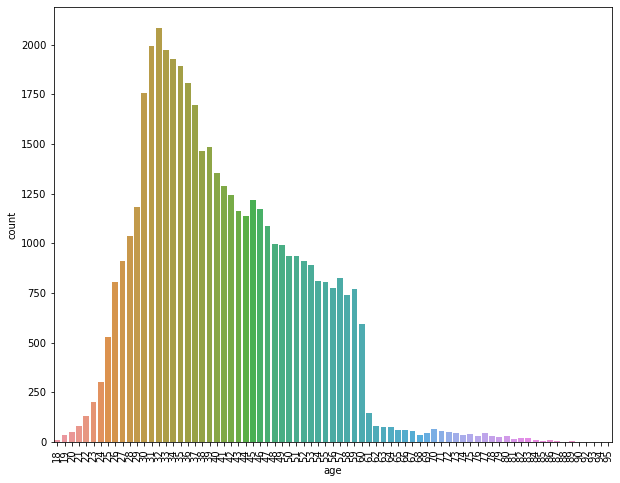

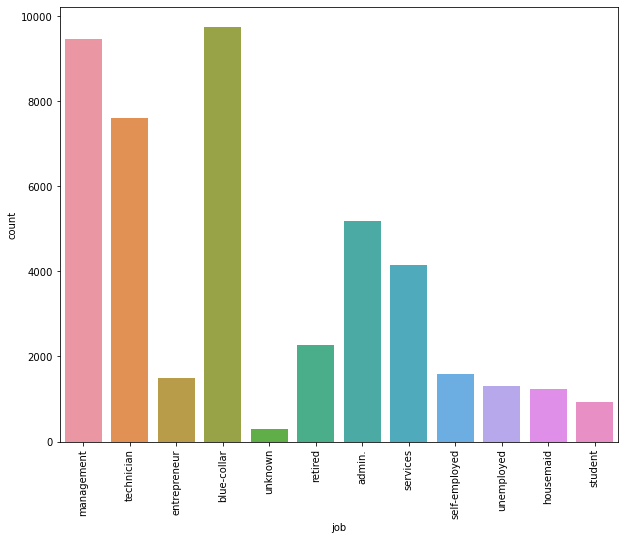

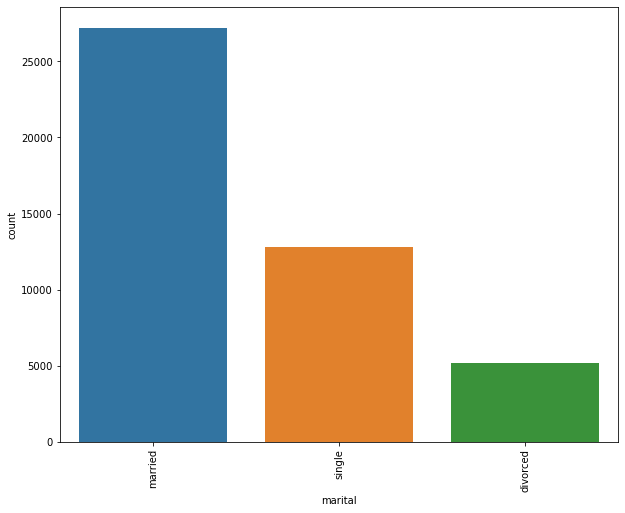

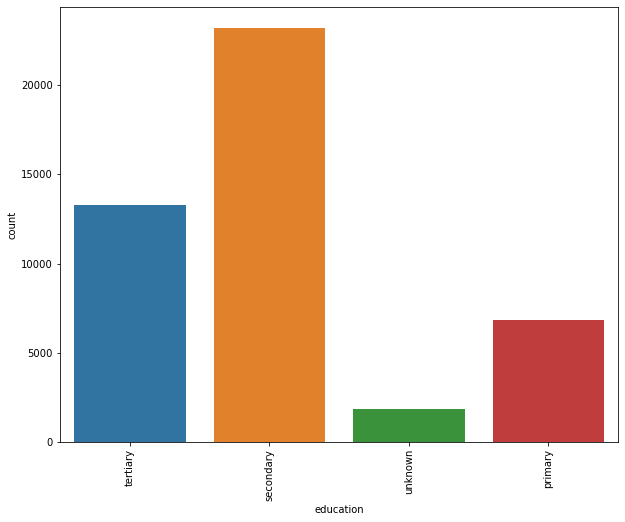

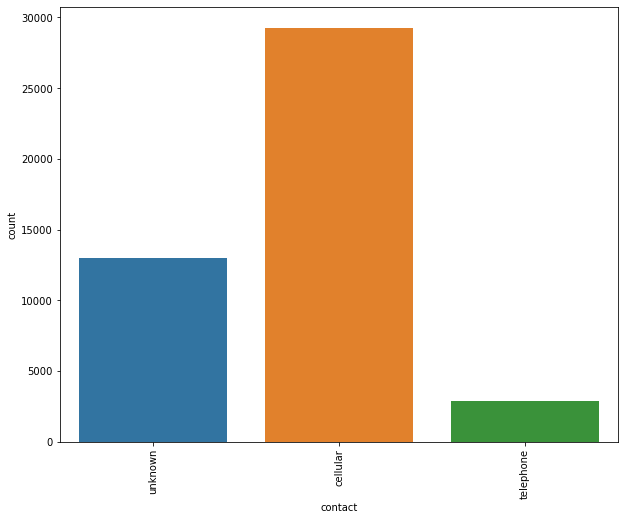

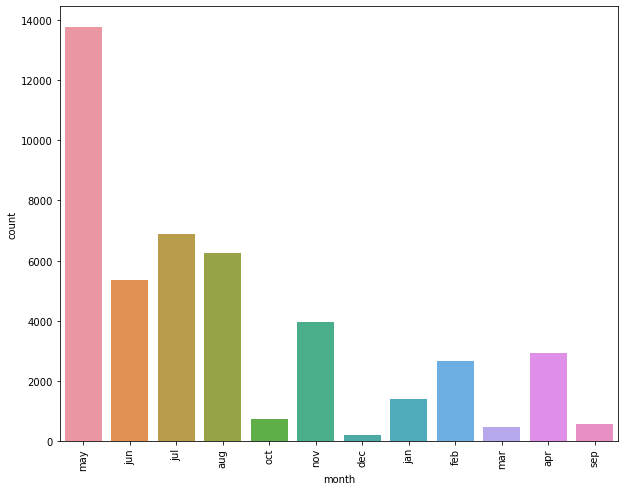

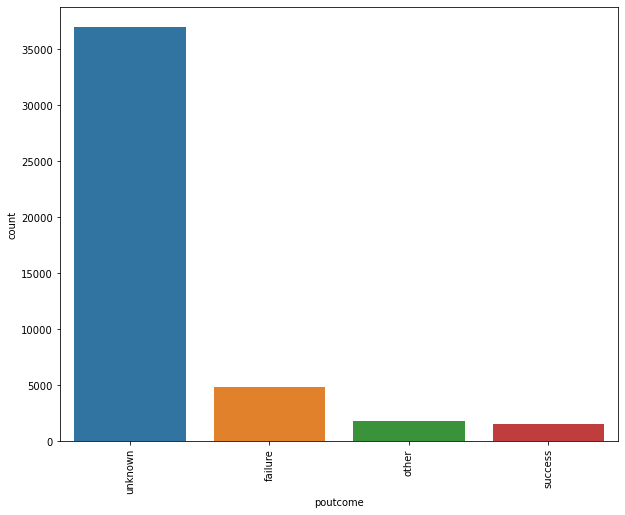

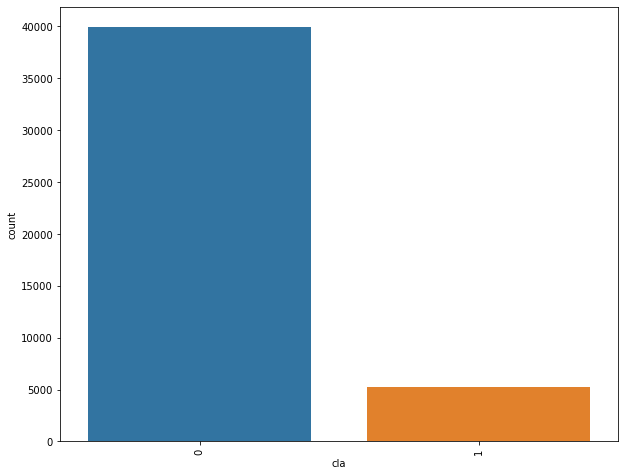

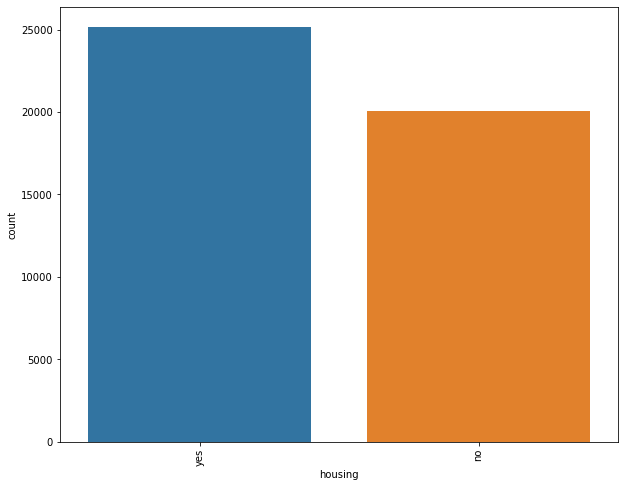

In [11]:
for feature in count_list:
    plt.figure(figsize=(10,8))
    sns.countplot(feature, data=bank)
    plt.xticks(rotation=90)
    plt.show()

from above plot we can say that :

for age - maximum no. of people are from age 25 to 60 

for job -  maximum no. of people are from management, services, technician, blue collar,admin job

for maritial - most of them are maried ,some people are unmaried and divorced

for cla - most of the people not subscribed a term deposite


    

<AxesSubplot:xlabel='job', ylabel='Count'>

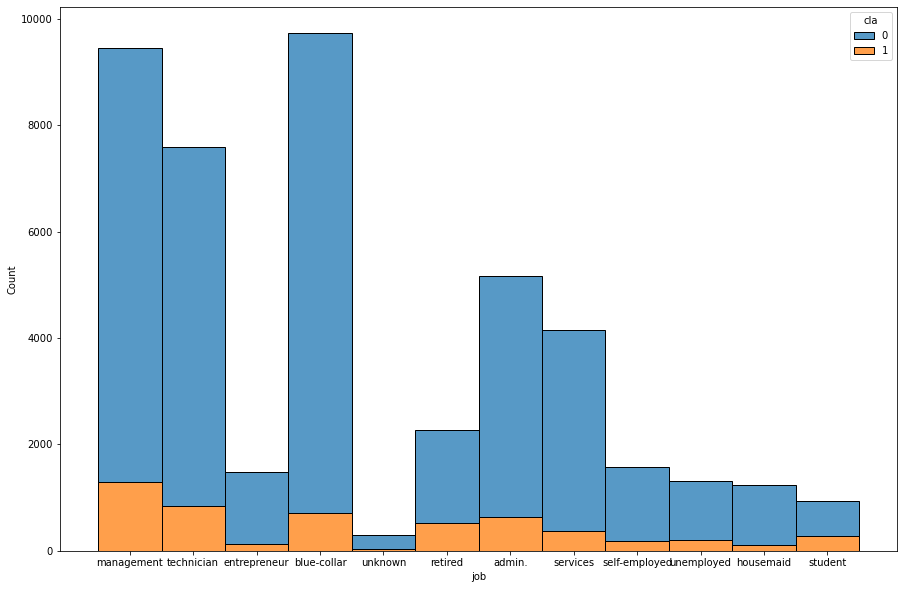

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(x='job',data=bank,hue='cla',multiple='stack')


from above plot we can say that as there no. of people having job in differant sections , but the proportion of having a term deposit is less throughout the all jobs 

age            AxesSubplot(0.125,0.125;0.168478x0.755)
balance     AxesSubplot(0.327174,0.125;0.168478x0.755)
day         AxesSubplot(0.529348,0.125;0.168478x0.755)
duration    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

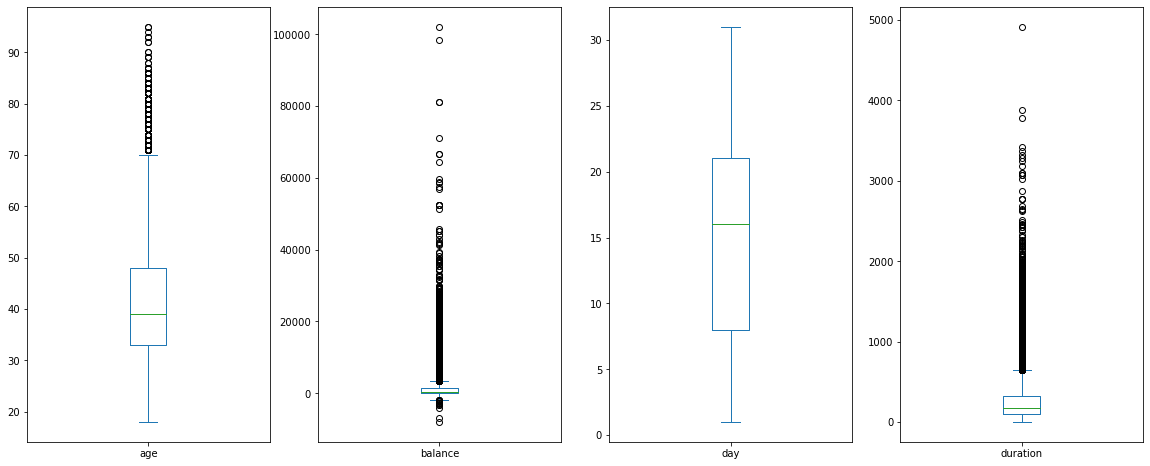

In [13]:
bank.iloc[:,[0,5,9,11]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

campaign       AxesSubplot(0.125,0.125;0.227941x0.755)
pdays       AxesSubplot(0.398529,0.125;0.227941x0.755)
previous    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

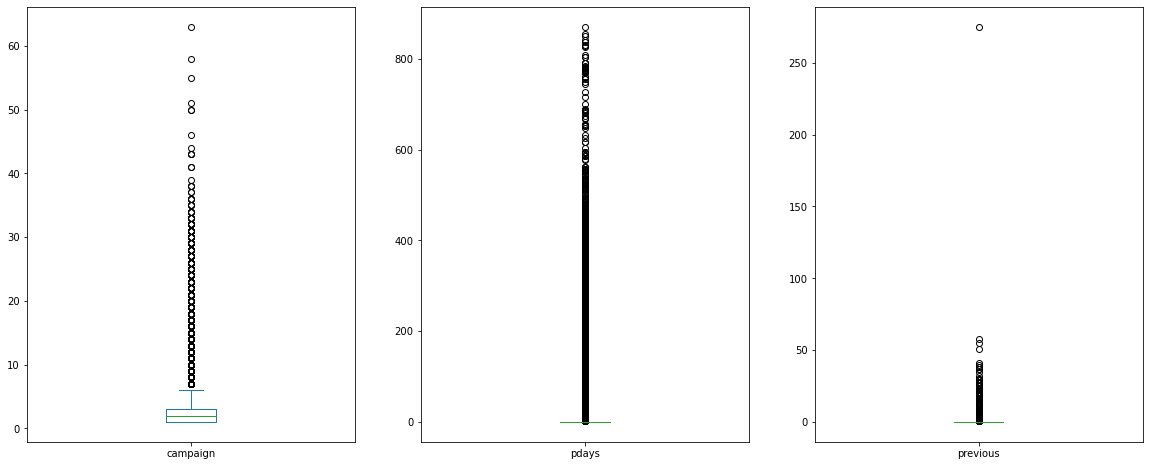

In [14]:
bank.iloc[:,[12,13,14]].plot(kind='box',figsize=(20,8),fontsize=10,subplots=True,sharex=False)

from above boxplots, it is clear that we have outliars in variables - AGE , CAMPAIGN , PDAYS , PREVIOUS , DURATION, BALENCE 

IN AGE we know bank have clients from  differant age groups in which most of them are from 25 to 60 
IN BALENCE few  clients have high bank balence and most are with average bank balence. 
IN DURATION  last contact duration, in seconds , it may more or less for some clients.
for remaining  variables they are also last contact details in several aspects  sometimes people didnt visit in the bank , 
they do there banking work either online or at online service station . therefore it may more  or less in days 


so we can not say that this are outliars. they are part of data set but far from mean datapoints.

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

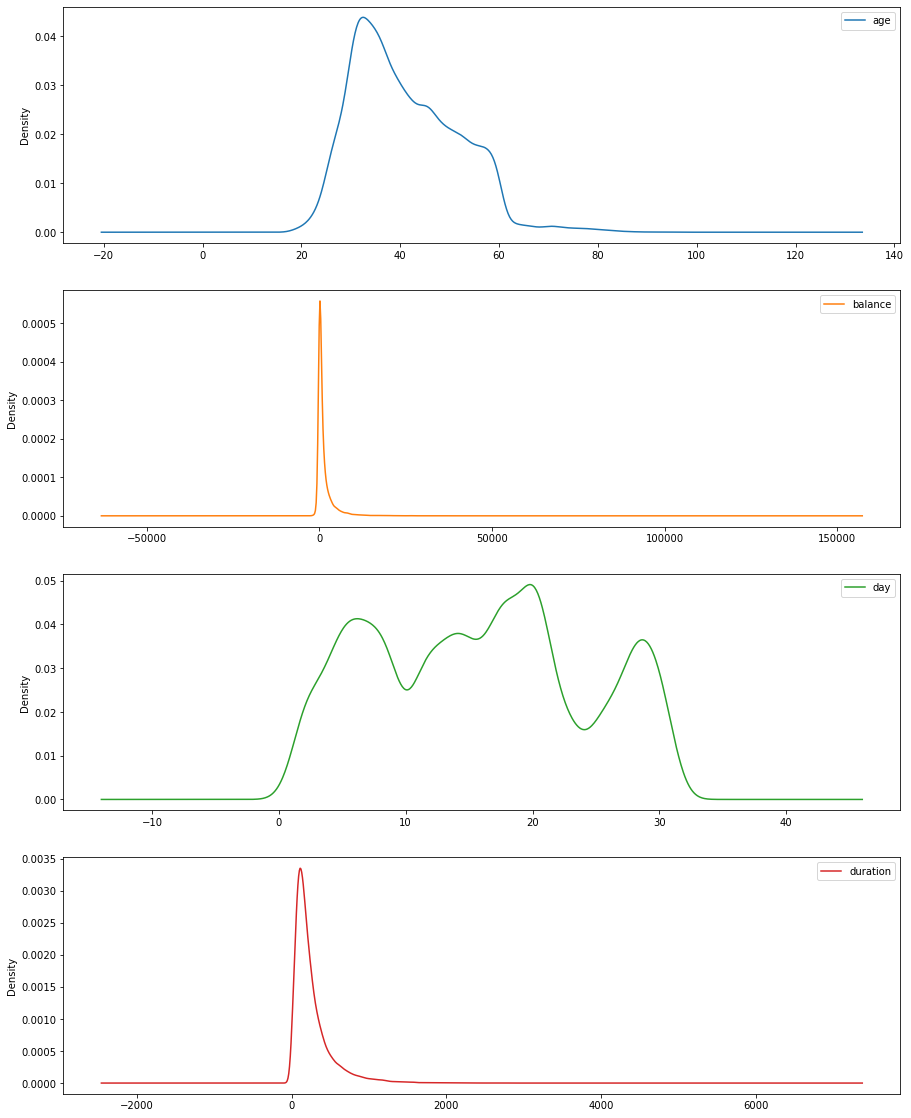

In [15]:
bank.iloc[:,[0,5,9,11]].plot(kind='kde',figsize=(15,20),fontsize=10,subplots=True,sharex=False)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

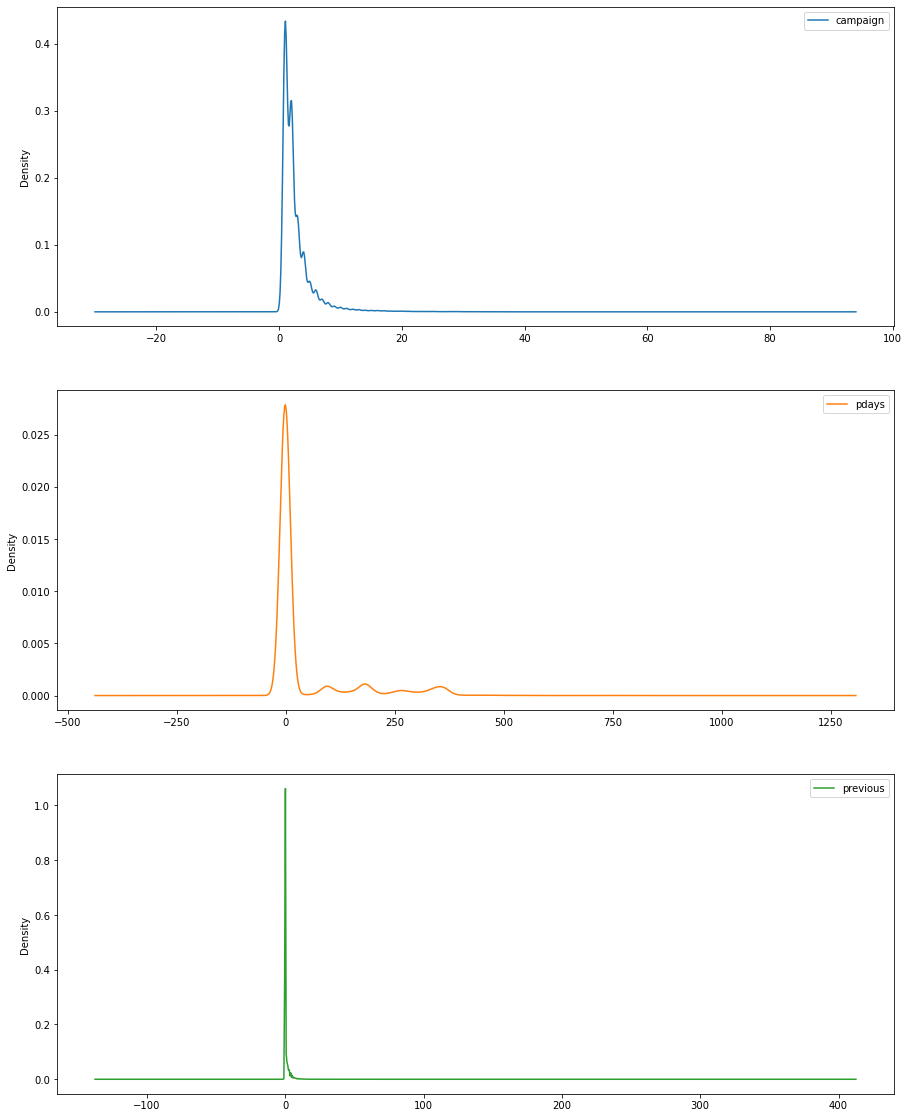

In [16]:
bank.iloc[:,[12,13,14]].plot(kind='kde',figsize=(15,20),fontsize=10,subplots=True,sharex=False)

All distribution plots are rightly skewed ,by distribution of plot we say that, by some data points disttribution 
is dragged  towards the tail on right side.

# labeling for input class and target class

In [17]:


x = bank.drop(['cla'], axis=1)

y = bank['cla']

In [18]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cla, dtype: int64

In [20]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import category_encoders as ce

# converting categorical independant variable to continous one by using category encoding

In [22]:
encoder=ce.OneHotEncoder(cols=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [23]:
x = encoder.fit_transform(x)

In [24]:
x

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,58,1,0,0,0,0,0,0,0,0,...,0,0,261,1,-1,0,1,0,0,0
1,44,0,1,0,0,0,0,0,0,0,...,0,0,151,1,-1,0,1,0,0,0
2,33,0,0,1,0,0,0,0,0,0,...,0,0,76,1,-1,0,1,0,0,0
3,47,0,0,0,1,0,0,0,0,0,...,0,0,92,1,-1,0,1,0,0,0
4,33,0,0,0,0,1,0,0,0,0,...,0,0,198,1,-1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,1,0,0,0,0,0,0,0,...,0,0,977,3,-1,0,1,0,0,0
45207,71,0,0,0,0,0,1,0,0,0,...,0,0,456,2,-1,0,1,0,0,0
45208,72,0,0,0,0,0,1,0,0,0,...,0,0,1127,5,184,3,0,0,0,1
45209,57,0,0,0,1,0,0,0,0,0,...,0,0,508,4,-1,0,1,0,0,0


In [25]:
x.columns

Index(['age', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'job_12', 'marital_1',
       'marital_2', 'marital_3', 'education_1', 'education_2', 'education_3',
       'education_4', 'default_1', 'default_2', 'balance', 'housing_1',
       'housing_2', 'loan_1', 'loan_2', 'contact_1', 'contact_2', 'contact_3',
       'day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome_1', 'poutcome_2',
       'poutcome_3', 'poutcome_4'],
      dtype='object')

# scaliing of data

In [26]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X = scaler.fit_transform(x)

In [27]:
X

array([[ 1.26666667,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33333333,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.2       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.2       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13333333,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [28]:
cols = x.columns
X = pd.DataFrame(X, columns=[cols])


In [29]:
X.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_11,month_12,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,1.266667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.375000,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.134259,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.481481,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.533333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.407407,-0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.400000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.083333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0


# building a model

In [30]:
classifier=LogisticRegression()


In [31]:
classifier.fit(X,y)

LogisticRegression()

In [32]:
#predict on same data 
y_predict=classifier.predict(X)

In [33]:
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
y_pred_df=pd.DataFrame({'actual':y,'predicted':y_predict})

In [35]:
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [36]:
y_pred_df.actual.value_counts()

0    39922
1     5289
Name: actual, dtype: int64

In [37]:
y_pred_df.predicted.value_counts()

0    42603
1     2608
Name: predicted, dtype: int64

In [38]:
correct=y_pred_df['actual']==y_pred_df['predicted']

In [39]:
correct

0         True
1         True
2         True
3         True
4         True
         ...  
45206     True
45207    False
45208     True
45209     True
45210     True
Length: 45211, dtype: bool

In [40]:
#checking for accuracy 
accuracy=correct.mean()*100
print(' accuracy of model = ', accuracy )

 accuracy of model =  90.09754263342991


# in regression we use r squared and r squared adjusted but in classification we use confusion matrix

confusion matrix usage to evaluate the quality of the output of a classifier on  data set.The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm=confusion_matrix(y,y_predict)

In [43]:
cm

array([[39024,   898],
       [ 3579,  1710]], dtype=int64)

CLASSIFICATION REPORT

It is one of the performance evaluation metrics of a classification-based machine learning model. It displays your model’s precision, recall, F1 score and support. It provides a better understanding of the overall performance of our trained model.

Precision is defined as the ratio of true positives to the sum of true and false positives.

Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
    
F1 Score	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

Support	Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.66      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.65      0.69     45211
weighted avg       0.89      0.90      0.89     45211



# F1 score is almost near to 1 , it means our model is working better.

In [46]:
import seaborn as sns

<AxesSubplot:>

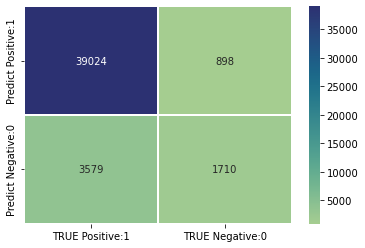

In [47]:
# heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['TRUE Positive:1', 'TRUE Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='crest',linewidths=0.2)

# checking accuracy by splitting data in trian and test by 0.7/0.3 ratio

# Train test validation split

In [48]:

from sklearn.model_selection import train_test_split
# 70% train data & 30% test data 
x_train, x_test,y_train, y_test = train_test_split(X,y ,test_size=0.3 )

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((31647, 51), (13564, 51), (31647,), (13564,))

In [50]:
# calling a model
classifier=LogisticRegression()

In [51]:
#fitting the model
classifier.fit(x_train,y_train)

LogisticRegression()

In [52]:
predicted_y=classifier.predict(x_test)
print(predicted_y)

[1 0 0 ... 0 0 0]


In [53]:
accuracy_test_m = np.mean(y_test==predicted_y)
print(' accuracy of model on test data = ', accuracy_test_m*100 )

 accuracy of model on test data =  89.7670303745208


In [54]:
#checking for x_train data 

In [55]:
predict_y=classifier.predict(x_train)

In [56]:
predict_y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
accuracy_train_m = np.mean(y_train==predict_y)
print(' accuracy of model on train data = ', accuracy_train_m*100 )

 accuracy of model on train data =  90.30555818876987


# accuracy is not shifted too much that means model learn on test data set which is very very good also there is no overfitting in model 

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,predict_y)
cm

array([[27280,   658],
       [ 2410,  1299]], dtype=int64)

<AxesSubplot:>

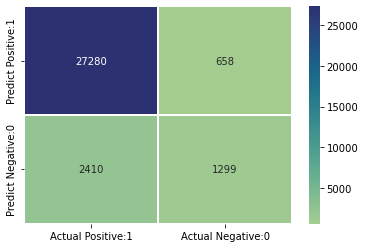

In [59]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='crest',linewidths=0.2)

# checking accuracy with differant validation technique

# K-Fold cross validation 

In [60]:
from sklearn.model_selection  import KFold
model = classifier
# we use logistic regression model with 10 no . of split and check for the accuracy
kfold_validation = KFold(10)

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(model,X,y,cv =kfold_validation)

print(result)

print ('mean accuracy = ',np.mean(result)*100)

[0.97036709 0.96416722 0.95531962 0.94448131 0.95045344 0.92855563
 0.86883433 0.88011502 0.85312984 0.58305685]
mean accuracy =  88.98480343487236


# stratified K-Fold cross validation 

In [63]:
from sklearn.model_selection import StratifiedKFold

skfold =StratifiedKFold(n_splits=10)
model = classifier

scores = cross_val_score(model,X,y,cv =skfold)

print (scores)
print ('mean score accuracy = ',np.mean(scores)*100)

[0.89230429 0.90444592 0.88387525 0.87193099 0.89228047 0.8849812
 0.84339748 0.74231365 0.90245521 0.76000885]
mean score accuracy =  85.77993296993996


# Repeated Random Test_Train Split

In [64]:
from sklearn.model_selection import ShuffleSplit
split= ShuffleSplit( n_splits=10, test_size = 0.3 )
model = classifier

split_scores = cross_val_score(model,X,y,cv =split )

print (split_scores)
print ('mean split_score accuracy = ',np.mean(split_scores)*100)

[0.90467414 0.89789148 0.90076674 0.90179888 0.90143026 0.89892362
 0.8991448  0.89929224 0.90047184 0.9027573 ]
mean split_score accuracy =  90.0715128280743


# from above validation techniques we seen that , accuracy almost unchanged with differant combinations . It means model trained in all aspects regarding the spread of data and performing well with this all techniques.